In [2]:
import pandas as pd
%matplotlib inline
monthly = pd.read_csv('f-f_daily_data.csv', header = 0, names = ['Date','MKT-RF','SMB','HML','RF'])
monthly['Date'] = pd.to_datetime(monthly['Date'], format = "%Y%m")
monthly = monthly[monthly['Date'] > '1980-01-01'].copy()

In [5]:
mstats = monthly['MKT-RF'].describe()

2-sigma: 95.5 percent

3-sigma: 99.73 percent

4-sigma: 99.993 percent

5-sigma: 99.99994 percent

In [16]:
sigma_events = [i * mstats['std'] for i in range(0,5)]

In [30]:
abs_mkt = pd.DataFrame(monthly['MKT-RF'].apply(lambda x: abs(x)))

In [31]:
abs_mkt.columns = ['AbsRet']
abs_mkt['Ret'] = monthly['MKT-RF']
abs_mkt.index = monthly['Date']

In [36]:
fstd = sigma_events[3]

In [40]:
abs_mkt[abs_mkt['AbsRet'] > fstd]['AbsRet'].sum() / abs_mkt['AbsRet'].sum() * 100

3.6615213281189294

In [68]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
# or: requests.get(url).content

resp = urlopen("http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_daily_CSV.zip")
zipfile = ZipFile(BytesIO(resp.read()))


FFdata = pd.read_csv(zipfile.open('F-F_Research_Data_Factors_daily.CSV'), 
                     header = 0, names = ['Date','MKT-RF','SMB','HML','RF'], 
                     skiprows=3)

#Drop last row of data - String
FFdata = FFdata[:FFdata['Date'].count() - 1]

#Convert YYYYMM into Date
FFdata['Date'] = pd.to_datetime(FFdata['Date'], format = "%Y%m%d")
FFdata.index = FFdata['Date']
FFdata.drop(FFdata.columns[0], axis=1,inplace=True)

#Drop Days in YYYY-MM-DD
FFdata.index = FFdata.index.map(lambda x: x.strftime('%Y-%m-%d'))

#Convert into float
FFdata = FFdata.astype('float')

In [72]:
FFdata['MKT-RF'].describe()

count    24180.000000
mean         0.029344
std          1.063336
min        -17.440000
25%         -0.400000
50%          0.060000
75%          0.490000
max         15.760000
Name: MKT-RF, dtype: float64

In [73]:
sigma_events = [i * FFdata['MKT-RF'].describe()['std'] for i in range(0,5)]

In [76]:
fs = sigma_events[4]

In [78]:
fsd = FFdata[FFdata['MKT-RF'].apply(lambda x: abs(x)) > fs]

In [82]:
fsd['MKT-RF'].count() / FFdata['MKT-RF'].count() * 100

0.7485525227460712

In [84]:
allmktr = FFdata['MKT-RF'].apply(abs).sum()
fsr = fsd['MKT-RF'].apply(abs).sum()

In [89]:
(fsr/allmktr) * 100

6.591023637387818

In [92]:
FFdata['MKT-RF'].count() * (100-99.99994)/100

0.014508000001168853

In [102]:
FFdata.index = pd.to_datetime(FFdata.index)

In [106]:
ff = FFdata.copy()

In [112]:
fsd['MKT-RF'].apply(abs).sum()

1089.3400000000001

In [113]:
ff['MKT-RF'].apply(abs).sum()

16527.63

In [116]:
ff['RF'].count()

24180

In [123]:
nfsd = fsd[fsd['MKT-RF'] < 0]

In [127]:
ff['Is5Std'] = ff['MKT-RF'].apply(abs) > fs

In [151]:
ff['ModRet'] = ff.apply(lambda row: 0 if row['Is5Std'] & (row['MKT-RF'] > 0) else row['MKT-RF'],axis=1)
ff['CModRet'] = ff['ModRet'].cumsum()
ff['MKT-RFC'] = ff['MKT-RF'].cumsum()

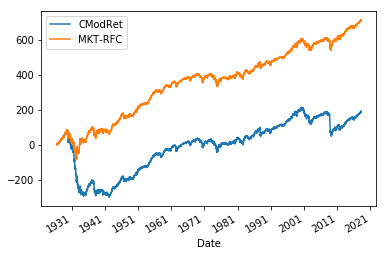

In [152]:
ff[['CModRet', 'MKT-RFC']].plot()

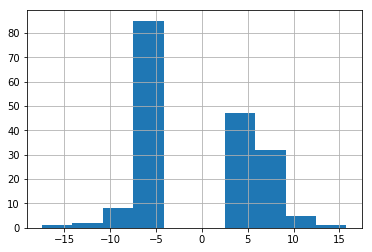

In [146]:
fsd['MKT-RF'].hist()

In [150]:
fsd

,MKT-RF,SMB,HML,RF
Date,,,,
1929-10-23,-5.65,0.68,0.58,0.018
1929-10-28,-11.29,1.26,3.96,0.018
1929-10-29,-12.01,0.26,2.12,0.018
1929-10-30,12.16,-7.25,-2.10,0.018
1929-10-31,6.10,2.51,-1.80,0.018
1929-11-04,-4.29,1.96,1.65,0.022
1929-11-06,-9.75,1.59,2.40,0.022
1929-11-11,-5.60,1.52,1.90,0.022
1929-11-12,-6.00,-1.14,0.45,0.022


In [154]:
days = ff.count()['MKT-RF']

In [156]:
days * (1-.9999994)

0.014508000000417187

In [157]:
fsd['MKT-RF'].count()

181

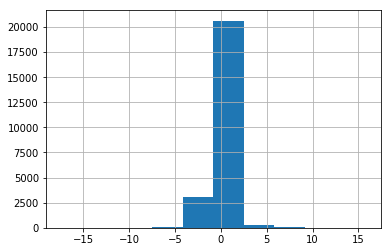

In [158]:
ff['MKT-RF'].hist()

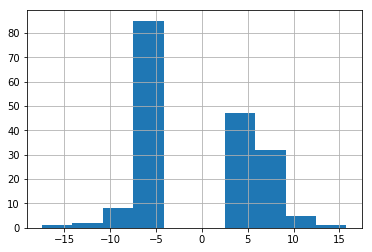

In [160]:
fsd['MKT-RF'].hist()